In [4]:
%matplotlib inline
import numpy as np
from numpy import matlib
import matplotlib.pyplot as plt
import time

In [5]:
# Load MNIST train and test data

## load image data
f=open('data/mnist/train-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open('data/mnist/train-labels-idx1-ubyte','rb')
g=f.read()
train_labels=np.array(bytearray(g[8:]))
f.close()

numI=60000
dima=28
dimb=28

#create matrix that is 60000 x 28 x 28
train=np.array(bytearray(gimage[16:]))
train.shape=(numI,dima,dimb)

## load image data
f=open('data/mnist/t10k-images-idx3-ubyte','rb')
gimage=f.read()
f.close()

## load labels
f=open('data/mnist/t10k-labels-idx1-ubyte','rb')
g=f.read()
test_labels=np.array(bytearray(g[8:]))
f.close()

numT=10000
dima=28
dimb=28

#create matrix that is 60000 x 28 x 28
test=np.array(bytearray(gimage[16:]))
test.shape=(numT,dima,dimb)

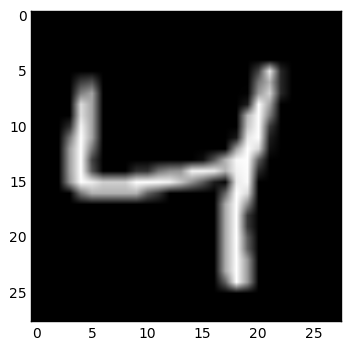

In [6]:
plt.imshow(train[2,:,:],cmap=plt.cm.gray)
plt.show()

In [7]:
train_labels[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0, 9,
       1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9, 3, 9,
       8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5, 6, 1, 0,
       0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9, 0, 4, 6, 7,
       4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [8]:
print train_labels.shape
print test_labels.shape

(60000,)
(10000,)


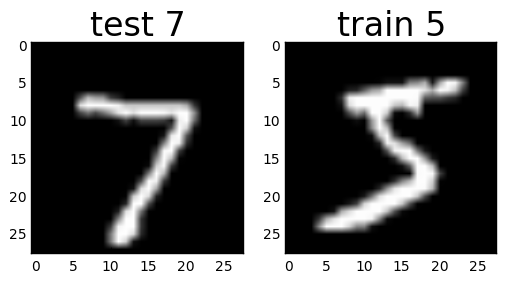

In [9]:
%matplotlib inline
#f, axarr = plt.subplots(2, sharex=True)
def dispij(testi,traini):
    plt.subplot(1,2,1)
    plt.imshow(test[testi,:,:],cmap=plt.cm.gray)
    plt.title('test ' + str(test_labels[testi]), fontsize=24)
    plt.subplot(1,2,2)
    plt.imshow(train[traini,:,:],cmap=plt.cm.gray)
    plt.title('train ' + str(train_labels[traini]), fontsize=24)
    plt.show()
dispij(0,0)

In [10]:
def closest_train(v):
    v = v.astype(np.int32)
    
    besti = -1
    bestval = np.array(2**32-1)
    
    for i in range(60000):
        w = train[i,:,:]
        diff = w-v
        s = np.sum(diff**2,axis=(0,1))
        
        if s < bestval:
            bestval = s
            besti = i
            
    return besti

In [11]:
testi = np.random.randint(10000)
v = test[testi,:,:]
testi

4827

53902


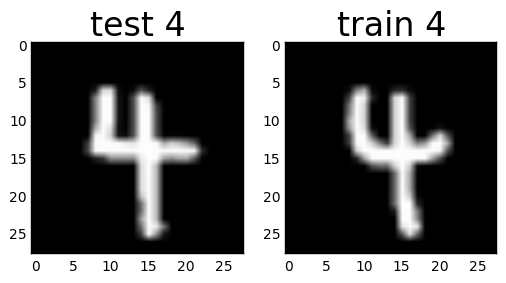

In [12]:
traini = closest_train(v)
print traini
dispij(testi,traini)

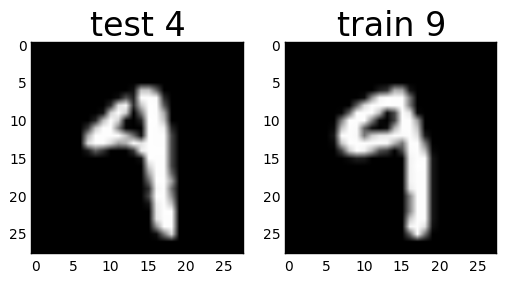

8.93649482727
1


In [13]:
np.random.seed(5)
num_iters = 10
errors = 0
t1 = time.time()
for it in range(num_iters):
    testi = np.random.randint(10000)
    
    v = test[testi,:,:]
    traini = closest_train(v)
    
    if (test_labels[testi] != train_labels[traini]):
        errors += 1
        dispij(testi,traini)
        
t2 = time.time()
print t2-t1
print errors

### The error rate of this is about 4%
### if use cubes, the error rate is about 3.6%
### if take first powers, the error rate is about 4.7%

# Break for dimensionality reduction

1.00151860355


(array([  7.42400000e+03,   1.52200000e+03,   5.75000000e+02,
          2.74000000e+02,   1.05000000e+02,   4.60000000e+01,
          3.00000000e+01,   1.50000000e+01,   3.00000000e+00,
          6.00000000e+00]),
 array([  3.68174382e-09,   1.30488451e+00,   2.60976901e+00,
          3.91465351e+00,   5.21953802e+00,   6.52442252e+00,
          7.82930702e+00,   9.13419152e+00,   1.04390760e+01,
          1.17439605e+01,   1.30488450e+01]),
 <a list of 10 Patch objects>)

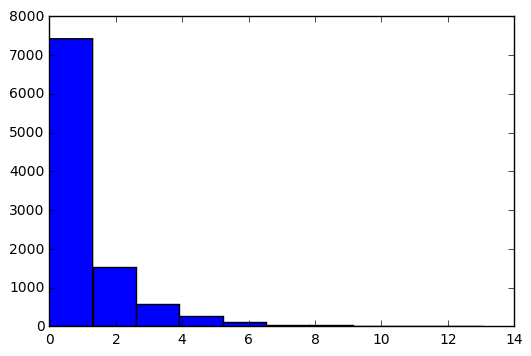

In [11]:
dat = np.random.randn(10000)**2
print np.mean(dat)
plt.hist(dat)

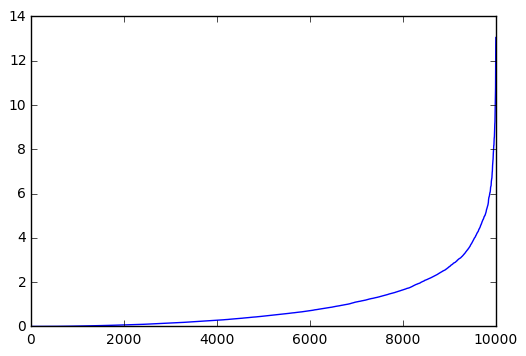

In [12]:
plt.plot(sorted(dat))

In [13]:
num_its = 10000
d = 100
dat = np.zeros((num_its))
for i in range(num_its):
    g = np.random.randn(d)
    dat[i] = sum(g**2)/d
np.mean(dat)

0.99966910542784881

(array([   40.,   450.,  1668.,  2904.,  2723.,  1483.,   559.,   145.,
           25.,     3.]),
 array([ 0.56142318,  0.67002273,  0.77862228,  0.88722183,  0.99582138,
         1.10442094,  1.21302049,  1.32162004,  1.43021959,  1.53881914,
         1.6474187 ]),
 <a list of 10 Patch objects>)

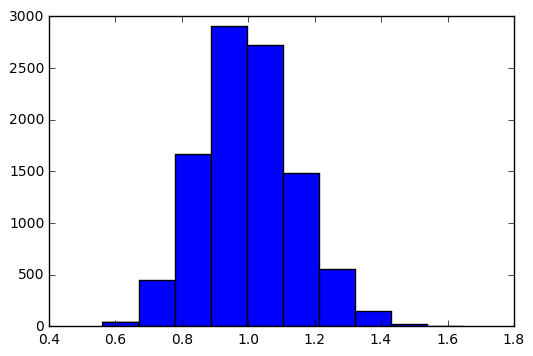

In [14]:
plt.hist(dat)

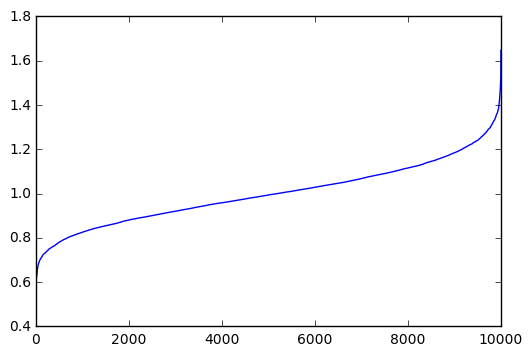

In [15]:
%matplotlib inline
plt.plot(sorted(dat))



In [16]:
trainv = train.copy()
trainv.shape = (60000,28*28)
testv = test.copy()
testv.shape = (10000,28*28)

In [17]:
dlarge = 28*28
dsmall = 50
print dlarge, dsmall

784 50


In [18]:
trans = np.random.randn(dlarge,dsmall)
trans_train = trainv.dot(trans)
trans_test = testv.dot(trans)
print trans_train.shape
print trans_test.shape

(60000, 50)
(10000, 50)


In [20]:
def closest_train_trans(v):
    
    diff = trans_train - v
    s = np.sum(diff**2,axis=1)
    traini = np.argmin(s)
    
    return traini

closest_train_trans(trans_test[1,:])

28882

In [21]:
def closest_train2(v):
    
    diff = trainv - v.astype(np.int32)
    s = np.sum(diff**2,axis=1)
    traini = np.argmin(s)
    
    return traini

closest_train2(testv[1,:])

28882

In [22]:
np.random.seed(1)
num_iters = 20
errors = 0
t1 = time.time()
for it in range(num_iters):
    testi = np.random.randint(10000)
    
    v = testv[testi,:]
    traini = closest_train2(v)
    
    errors += (test_labels[testi] != train_labels[traini])
        
t2 = time.time()
print t2-t1
print errors

9.11033916473
1


In [23]:
np.random.seed(1)
num_iters = 20
errors = 0
t1 = time.time()
for it in range(num_iters):
    testi = np.random.randint(10000)
    
    v = trans_test[testi,:].astype(np.int32)
    traini = closest_train_trans(v)
    
    errors += (test_labels[testi] != train_labels[traini])
        
t2 = time.time()
print t2-t1
print errors

0.585966110229
2


### With dsmall = 50, get an error rate of around 8%
### With dsmall = 176, is around 4.8% 

# LSH

In [28]:
import lshash

In [29]:
lsh = lshash.LSHash(10,784,num_hashtables = 5)

In [30]:
for i in range(60000):
    lsh.index(trainv[i],extra_data=i)
    

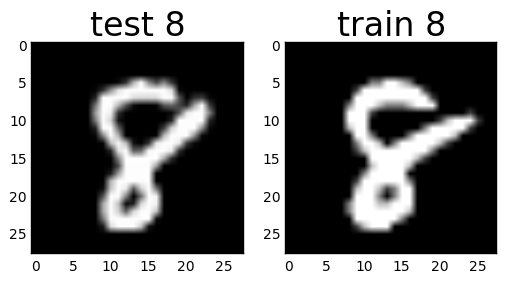

In [31]:
testi = np.random.randint(10000)
q = lsh.query(testv[testi],num_results = 1,distance_func="euclidean")
traini = q[0][0][1]
dispij(testi, traini)

In [32]:
num_iters = 50
errors = 0
t1 = time.time()
for it in range(num_iters):
    j = np.random.randint(10000)
    
    q = lsh.query(testv[j],num_results = 1,distance_func="euclidean")
    i = q[0][0][1]
       
    errors += (test_labels[j] != train_labels[i])

t2 = time.time()
print t2-t1
print errors

22.9212090969
1


## Error rate 4.2%